# Classical Planning Exploration

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
results_df = pd.read_csv('./results.csv')

The complete table of results comparing all eleven search algorithms for each of the four planning problems.

In [47]:
display(results_df)

,problem,algorithm,actions,expansions,goal_tests,new_nodes,plan_length,execution_time
0,1,breadth_first_search,20,43,56,178,6,0.022632
1,1,depth_first_graph_search,20,21,22,84,20,0.006242
2,1,uniform_cost_search,20,60,62,240,6,0.017548
3,1,greedy_best_first_graph_search with h_unmet_goals,20,7,9,29,6,0.001667
4,1,greedy_best_first_graph_search with h_pg_levelsum,20,6,8,28,6,0.364773
5,1,greedy_best_first_graph_search with h_pg_maxlevel,20,6,8,24,6,0.134647
6,1,greedy_best_first_graph_search with h_pg_setlevel,20,6,8,28,6,0.609376
7,1,astar_search with h_unmet_goals,20,50,52,206,6,0.009193
8,1,astar_search with h_pg_levelsum,20,28,30,122,6,0.282280
9,1,astar_search with h_pg_maxlevel,20,43,45,180,6,0.123078


## Use a table or chart to analyze the number of nodes expanded against number of actions in the domain

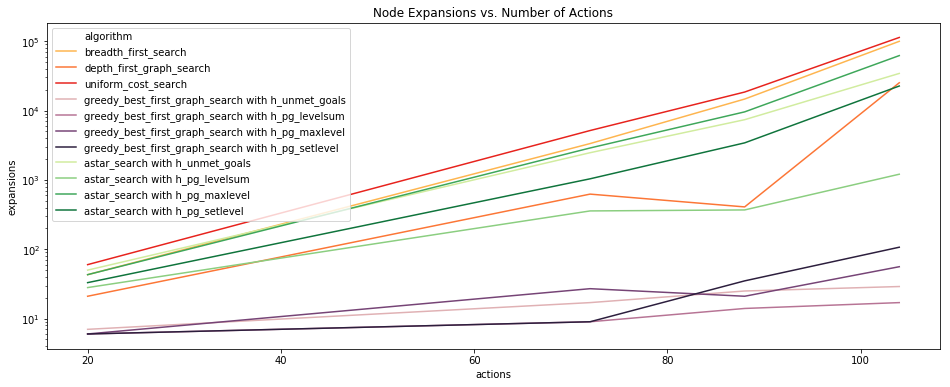

In [39]:
cell.metadata.hide_input=True
colours = ["#FEB54F", "#FC7636", "#E7231D", "#E0B1B4", "#B77495", "#764476", "#2C1E3D", "#D1EC9F", "#8BCE80", "#3EA75A", "#0F743C"]
plt.figure(figsize=(16, 6))
plt.title("Node Expansions vs. Number of Actions")
ax = sns.lineplot(x="actions", y="expansions", hue="algorithm", data=results_df, palette=sns.color_palette(colours))
ax.set(yscale="log")
plt.show()

## Use a table or chart to analyze the search time against the number of actions in the domain

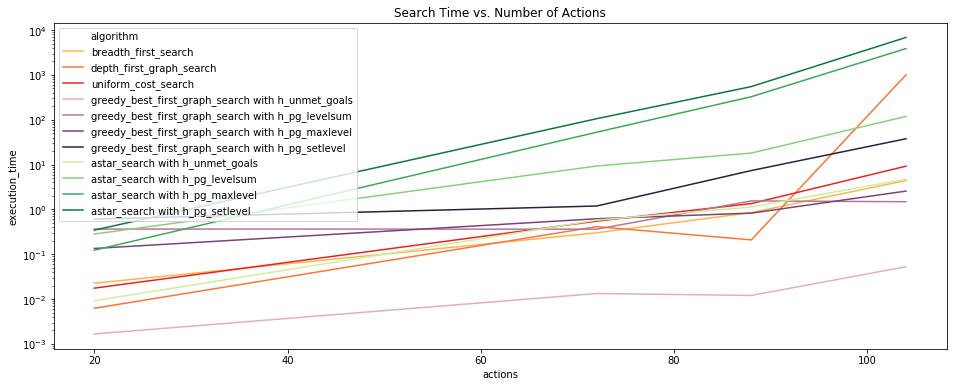

In [41]:
cell.metadata.hide_input=True
plt.figure(figsize=(16, 6))
plt.title("Search Time vs. Number of Actions")
ax = sns.lineplot(x="actions", y="execution_time", hue="algorithm", data=results_df, palette=sns.color_palette(colours))
ax.set(yscale="log")
plt.show()

## Use a table or chart to analyze the length of the plans returned by each algorithm on all search problems

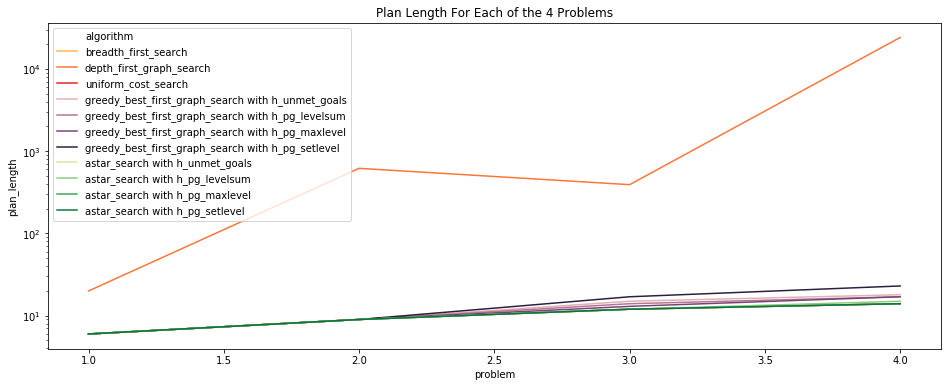

In [48]:
cell.metadata.hide_input=True
plt.figure(figsize=(16, 6))
plt.title("Plan Length For Each of the 4 Problems")
ax = sns.lineplot(x="problem", y="plan_length", hue="algorithm", data=results_df, palette=sns.color_palette(colours))
ax.set(yscale="log")
plt.show()

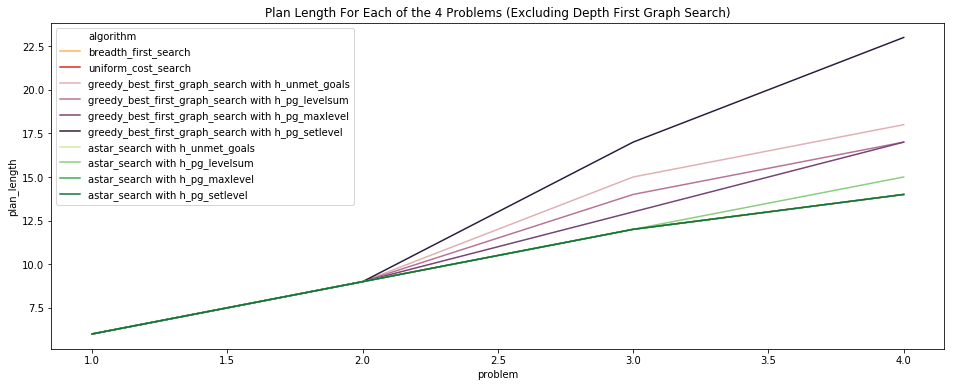

In [46]:
cell.metadata.hide_input=True
revised_colours = ["#FEB54F", "#E7231D", "#E0B1B4", "#B77495", "#764476", "#2C1E3D", "#D1EC9F", "#8BCE80", "#3EA75A", "#0F743C"]
results_without_depth_first_df = results_df[(results_df["algorithm"] != 'depth_first_graph_search')]
plt.figure(figsize=(16, 6))
plt.title("Plan Length For Each of the 4 Problems (Excluding Depth First Graph Search)")
ax = sns.lineplot(x="problem", y="plan_length", hue="algorithm", data=results_without_depth_first_df, palette=sns.color_palette(revised_colours))
plt.show()

## Which algorithm or algorithms would be most appropriate for planning in a very restricted domain (i.e., one that has only a few actions) and needs to operate in real time?

For problems that have few actions, all of the algorithms perform equally well in terms of finding the optimal plan. They don't, however, perfrom equally well in terms of the nodes expanded and how long the search took to execute. The most important consideration when dealing with real time applications is the time it takes for the search to execute. With this in mind, the **greedy best first graph search with the unmet goals heuristic** executed 3.7 times faster than the next fastest execution for problem 1 and 365 times faster than the algorithm with the slowest execution.

## Which algorithm or algorithms would be most appropriate for planning in very large domains (e.g., planning delivery routes for all UPS drivers in the U.S. on a given day)

It depends what is most important to optimise for the problem at hand. If node expansion (memory / space requirements) and execution time are most important when searching for a plan that solves a complex problem, then **greedy best first graph search** expands the fewest nodes and searching with the **unmet goals heuristic** it executes the fastest. However, these algorithms performed the worst when it came to finding the optimal path. I would argue for a problems such as logistics planning where taking unnecessary steps to complete a plan would cost a company far more than the search execution time. In this case, finding the optimal plan is more important which suggests that **A\*** would be a better choice and executing it using the **unmet goals heuristic** minimises the execution time and node expansion while optimising the plan length.

## Which algorithm or algorithms would be most appropriate for planning problems where it is important to find only optimal plans?

Without a doubt the most successful search algorithm when it came to consistently finding the optimal plan is **A\***. All of the algorithms found the optimal plan for problems 1 and 2 but the performance of the algorithms began to diverge for problems 3 and 4. All of heuristics used with **A\*** found the optimal plan for problem 3 while all but one found the optimal plan for problem 4. The **unmet goals heuristic** provides the best balance between performance and search execution time while consistently finding the optimal path.